# ENGG 27.02 LAB ACTIVITY 2


## Bisection Method
1. Given \$f(x)=−2x^6−1.5x^4+10x+2\$ Use bisection to determine the maximum of this function. Employ initial guesses of \$x_l=0\$ and \$x_u=1\$ , and perform iterations until the approximate relative error falls below \$5%\$.

In [1]:
#johnrel code

## Secant Method
2. Use the secant method on the circle function \$(x+1)^2+(y−2)^2=16\$  to find a positive real root. Set your initial guess to \$x_i=3\$  and \$x_i−1 =0.5\$. Approach the solution from the first and fourth quadrants. When solving for \$f(x)\$  in the fourth quadrant, be sure to take the negative value of the square root. Why does your solution diverge?

function: f(x) = x - sin(x) - 1/2
term #6: secant estimate of 1.4973003890967367


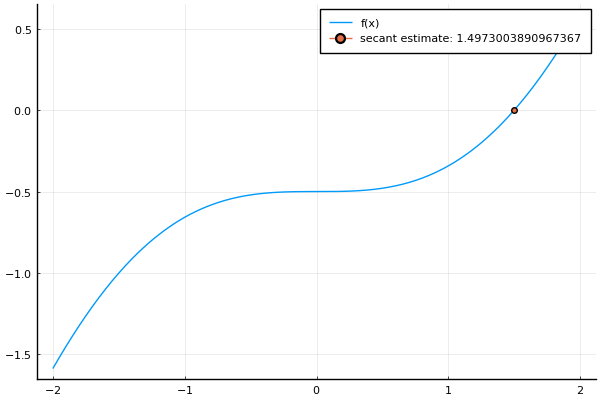

In [100]:
function secant(f::Function, x0, x1, n)
    convergex = 0.0; convergefx = 0.0;
    for i in 1:n
        x = x1 - f(x1) * (x1-x0)/(f(x1)-f(x0))
        if abs(x-x1) < 1e-5
            println("term #$i: secant estimate of $x")            
            convergex = x
            convergefx = f(x)
            break
        end
        x0 = x1
        x1 = x
    end
    ugh(convergex, convergefx)
end

using Plots; pyplot()
function ugh(x, fx)
    plot!([x],[fx], label="secant estimate: $x", markershape = :circle)
end

f(x)=x-sin(x)- 1/2
println("function: f(x) = x - sin(x) - 1/2")
t=-2:0.01:2
plot(t, f, label="f(x)")
secant(f, 1, 2, 20)

## Brent's Method
3. Determine the lowest real root of \$f(x)=−12−21x+18x^2−2.4x^3\$ using Brent’s method to a value of εs corresponding to three significant figures.

In [5]:
#both assigned